### 📃 데이터세트 주제 : 미국 주택 가격 예측 (Regression)

### cloumn's introduction
- condition : 상태
- sqft_living : 집의 평방 피트(면적)
- sqft_above : 주택의 지상 층 면적
- sqft_basement : 집의 지하실 면적
- sqft_lot15 : 주변 지역의 부지 크기 (해당 주택이 속한 지역 부지 크기의 평균 값)

### 로직 구성
1. 데이터 전처리
2. 회귀모델 학습
3. 데이터 전처리 및 회귀 분석 업데이트
4. OLS , VIF 점수 출력
5. 최종 회귀결과 도출

In [1]:
import pandas as pd
import numpy as np

h_df = pd.read_csv('./datasets/kc_house_data.csv')
h_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [2]:
h_df = h_df.drop(labels=['id','waterfront','view','yr_renovated','zipcode','long','lat', 'date'], axis=1)
h_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,3,8,1530,0,2009,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,3,8,2310,0,2014,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,3,7,1020,0,2009,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,3,8,1600,0,2004,1410,1287


In [3]:
h_df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
h_df.duplicated().sum()

6

In [5]:
h_df = h_df.drop_duplicates()
h_df.duplicated().sum()

0

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>],
       [<Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'sqft_living15'}>],
       [<Axes: title={'center': 'sqft_lot15'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

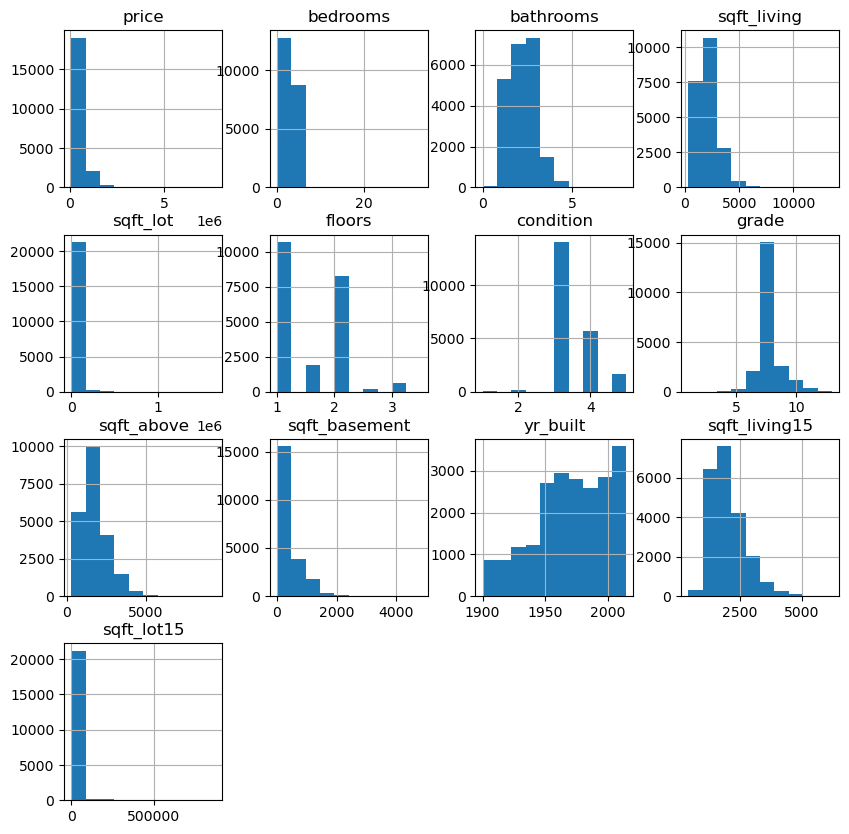

In [6]:
h_df.hist(figsize=(10,10))

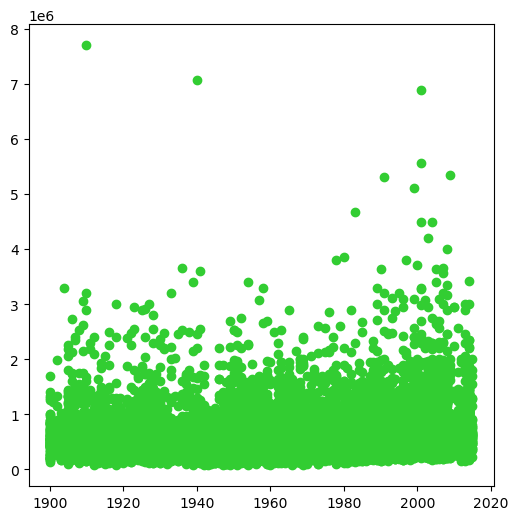

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,6))

plt.scatter(h_df['yr_built'], h_df['price'], color='limegreen')
plt.show()

In [8]:
pre_df = h_df.copy()

In [9]:
h_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,3,8,1530,0,2009,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,3,8,2310,0,2014,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,3,7,1020,0,2009,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,3,8,1600,0,2004,1410,1287


In [10]:
pre_df = pre_df.drop(labels=['sqft_basement'], axis=1)
pre_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,1955,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,1951,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,1933,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,1965,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,1987,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,3,8,1530,2009,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,3,8,2310,2014,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,3,7,1020,2009,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,3,8,1600,2004,1410,1287


In [11]:
pre_df = pre_df.drop(labels=['sqft_living15', 'yr_built', 'sqft_lot15', 'sqft_above', 'condition', 'grade'], axis=1)
pre_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors
0,221900.0,3,1.00,1180,5650,1.0
1,538000.0,3,2.25,2570,7242,2.0
2,180000.0,2,1.00,770,10000,1.0
3,604000.0,4,3.00,1960,5000,1.0
4,510000.0,3,2.00,1680,8080,1.0
...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0
21609,400000.0,4,2.50,2310,5813,2.0
21610,402101.0,2,0.75,1020,1350,2.0
21611,400000.0,3,2.50,1600,2388,2.0


In [12]:
pre_df.reset_index(drop=True, inplace=True)
pre_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors
0,221900.0,3,1.00,1180,5650,1.0
1,538000.0,3,2.25,2570,7242,2.0
2,180000.0,2,1.00,770,10000,1.0
3,604000.0,4,3.00,1960,5000,1.0
4,510000.0,3,2.00,1680,8080,1.0
...,...,...,...,...,...,...
21602,360000.0,3,2.50,1530,1131,3.0
21603,400000.0,4,2.50,2310,5813,2.0
21604,402101.0,2,0.75,1020,1350,2.0
21605,400000.0,3,2.50,1600,2388,2.0


In [13]:
pre_df.corr()['price'].sort_values(ascending=False)[1:]

sqft_living    0.702041
bathrooms      0.525163
bedrooms       0.308389
floors         0.256921
sqft_lot       0.089646
Name: price, dtype: float64

In [14]:
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'price']
new_df = pre_df[columns]
new_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,3,1.00,1180,5650,1.0,221900.0
1,3,2.25,2570,7242,2.0,538000.0
2,2,1.00,770,10000,1.0,180000.0
3,4,3.00,1960,5000,1.0,604000.0
4,3,2.00,1680,8080,1.0,510000.0
...,...,...,...,...,...,...
21602,3,2.50,1530,1131,3.0,360000.0
21603,4,2.50,2310,5813,2.0,400000.0
21604,2,0.75,1020,1350,2.0,402101.0
21605,3,2.50,1600,2388,2.0,400000.0


In [15]:
price_df = new_df.loc[:, 'price'].reset_index()
display(price_df)

,index,price
0,0,221900.0
1,1,538000.0
2,2,180000.0
3,3,604000.0
4,4,510000.0
...,...,...
21602,21602,360000.0
21603,21603,400000.0
21604,21604,402101.0
21605,21605,400000.0


In [16]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_price = std.fit_transform(price_df[['price']])
std_price

array([[-0.86666447],
       [-0.00573782],
       [-0.98078287],
       ...,
       [-0.37587092],
       [-0.38159318],
       [-0.58586239]])

In [17]:
price_df['price'] = std_price
display(price_df)


,index,price
0,0,-0.866664
1,1,-0.005738
2,2,-0.980783
3,3,0.174019
4,4,-0.081998
...,...,...
21602,21602,-0.490537
21603,21603,-0.381593
21604,21604,-0.375871
21605,21605,-0.381593


In [18]:
a1 = price_df['price'] >= -1.96
a2 = price_df['price'] <= 1.96
a = a1 & a2
new_df = new_df.loc[new_df[a].index].reset_index(drop=True)

In [19]:
new_df.reset_index()

,index,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,0,3,1.00,1180,5650,1.0,221900.0
1,1,3,2.25,2570,7242,2.0,538000.0
2,2,2,1.00,770,10000,1.0,180000.0
3,3,4,3.00,1960,5000,1.0,604000.0
4,4,3,2.00,1680,8080,1.0,510000.0
...,...,...,...,...,...,...,...
20737,20737,3,2.50,1530,1131,3.0,360000.0
20738,20738,4,2.50,2310,5813,2.0,400000.0
20739,20739,2,0.75,1020,1350,2.0,402101.0
20740,20740,3,2.50,1600,2388,2.0,400000.0


array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

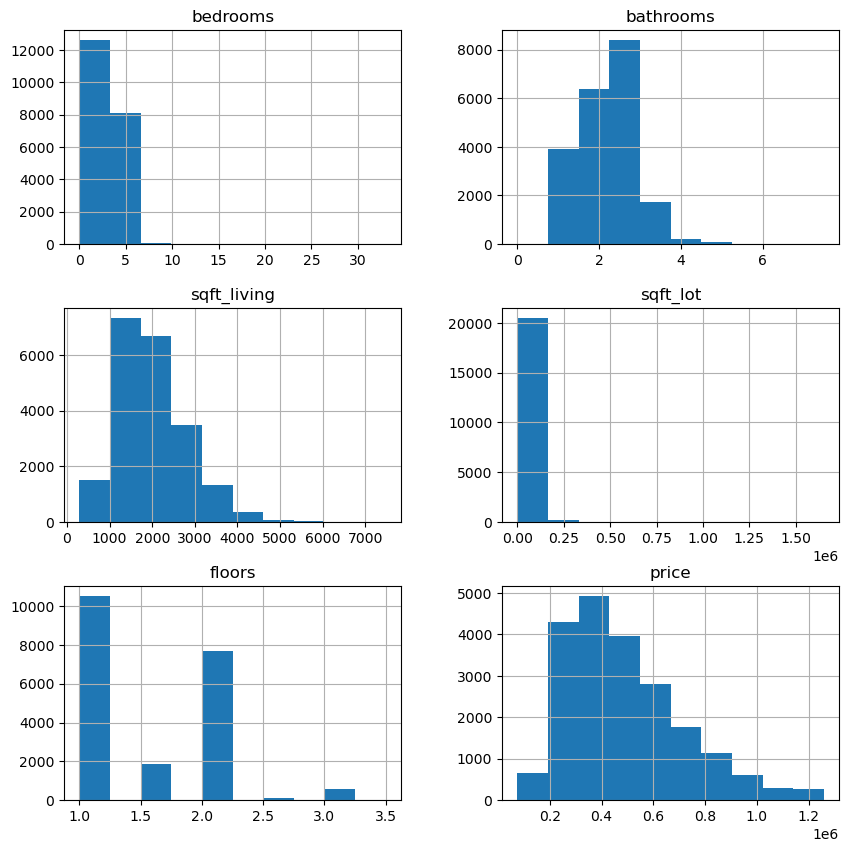

In [20]:
new_df.hist(figsize=(10,10))

In [21]:
new_df = new_df.drop_duplicates()
new_df.reset_index()

,index,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,0,3,1.00,1180,5650,1.0,221900.0
1,1,3,2.25,2570,7242,2.0,538000.0
2,2,2,1.00,770,10000,1.0,180000.0
3,3,4,3.00,1960,5000,1.0,604000.0
4,4,3,2.00,1680,8080,1.0,510000.0
...,...,...,...,...,...,...,...
20733,20737,3,2.50,1530,1131,3.0,360000.0
20734,20738,4,2.50,2310,5813,2.0,400000.0
20735,20739,2,0.75,1020,1350,2.0,402101.0
20736,20740,3,2.50,1600,2388,2.0,400000.0


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = new_df.iloc[:,:-1], new_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [23]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [24]:
linear_prediction = l_r.predict(X_test)
get_evaluation(y_test, linear_prediction)

MSE: 27970942413.5865, RMSE: 167245.1566, MSLE: 0.1242, RMSLE: 0.3524, R2: 0.4369


### 💡 선형 회귀모델 (Linear Regression) 분석 결과 
> R2 값 : 0.4239
> 
> RMSE : 169064

In [25]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

features, targets = new_df.iloc[:,:-1], new_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.7, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=100)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 51798467558.3852, RMSE: 227592.7669, MSLE: 0.2184, RMSLE: 0.4674, R2: -0.0483
RandomForestRegressor
MSE: 28515109749.7033, RMSE: 168864.1754, MSLE: 0.1223, RMSLE: 0.3497, R2: 0.4229
GradientBoostingRegressor
MSE: 25955546097.4509, RMSE: 161107.2503, MSLE: 0.1133, RMSLE: 0.3366, R2: 0.4747
XGBRegressor
MSE: 28814789820.7956, RMSE: 169749.1968, MSLE: 0.1215, RMSLE: 0.3486, R2: 0.4169
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 544
[LightGBM] [Info] Number of data points in the train set: 6221, number of used features: 5
[LightGBM] [Info] Start training from score 485597.265391
LGBMRegressor
MSE: 26252842362.4073, RMSE: 162027.2889, MSLE: 0.1129, RMSLE: 0.3360, R2: 0.4687


In [27]:
gb_prediction = gb_r.predict(X_test)

### 💡 GBM회귀모델 (Gradient Boosting Regression) 분석 결과 
> R2 값 : 0.4800
> 
> RMSE : 160371

array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

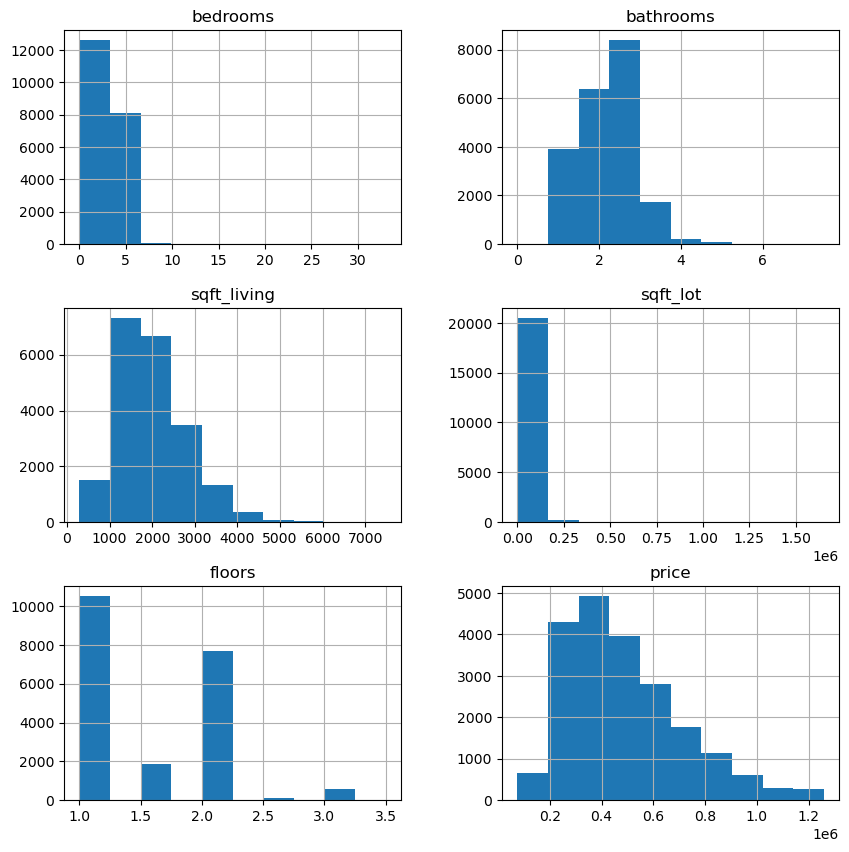

In [28]:
new_df.hist(figsize=(10,10))

In [29]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,20738.0,3.338847,0.916169,0.0,3.0,3.00,4.0,33.0
bathrooms,20738.0,2.063687,0.719737,0.0,1.5,2.25,2.5,7.5
sqft_living,20738.0,1996.254268,797.646055,290.0,1400.0,1870.00,2460.0,7480.0
sqft_lot,20738.0,14702.034864,40080.949664,520.0,5000.0,7522.00,10400.0,1651359.0
floors,20738.0,1.479940,0.537101,1.0,1.0,1.00,2.0,3.5
price,20738.0,486685.733340,223042.007759,75000.0,316000.0,440000.00,612000.0,1258000.0


In [30]:
new_df.corr()['price'].sort_values(ascending=False)[1:]

sqft_living    0.639228
bathrooms      0.469172
bedrooms       0.304078
floors         0.277556
sqft_lot       0.093249
Name: price, dtype: float64

<Axes: >

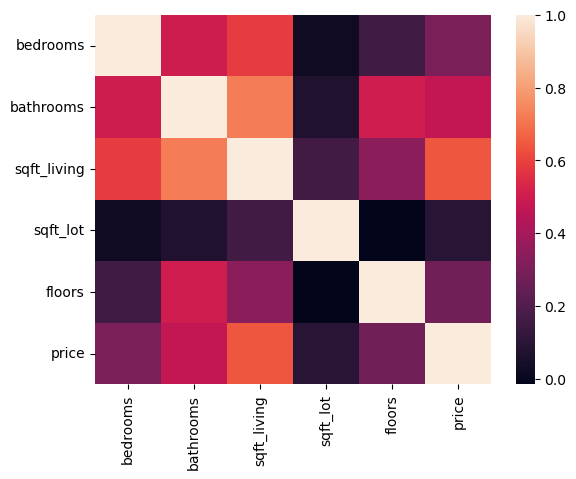

In [31]:
import seaborn as sns
sns.heatmap(new_df.corr())

In [32]:
from statsmodels.api import OLS

features, targets = new_df.iloc[:, :-1], new_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.895
Model:                            OLS   Adj. R-squared (uncentered):              0.895
Method:                 Least Squares   F-statistic:                          3.531e+04
Date:                Wed, 01 May 2024   Prob (F-statistic):                        0.00
Time:                        14:05:40   Log-Likelihood:                     -2.7961e+05
No. Observations:               20738   AIC:                                  5.592e+05
Df Residuals:                   20733   BIC:                                  5.593e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

#### sqft_lot Feature의 p-value 값이 다른 피처들에 비해 높은 것을 확인 
#### 즉 Target 데이터에 큰 영향을 끼치는 것으로 보이진 않는다.

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [34]:
get_vif(features)

,vif_score,feature
0,13.934071,bedrooms
1,23.353286,bathrooms
2,18.106109,sqft_living
3,1.174000,sqft_lot
4,9.582578,floors


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

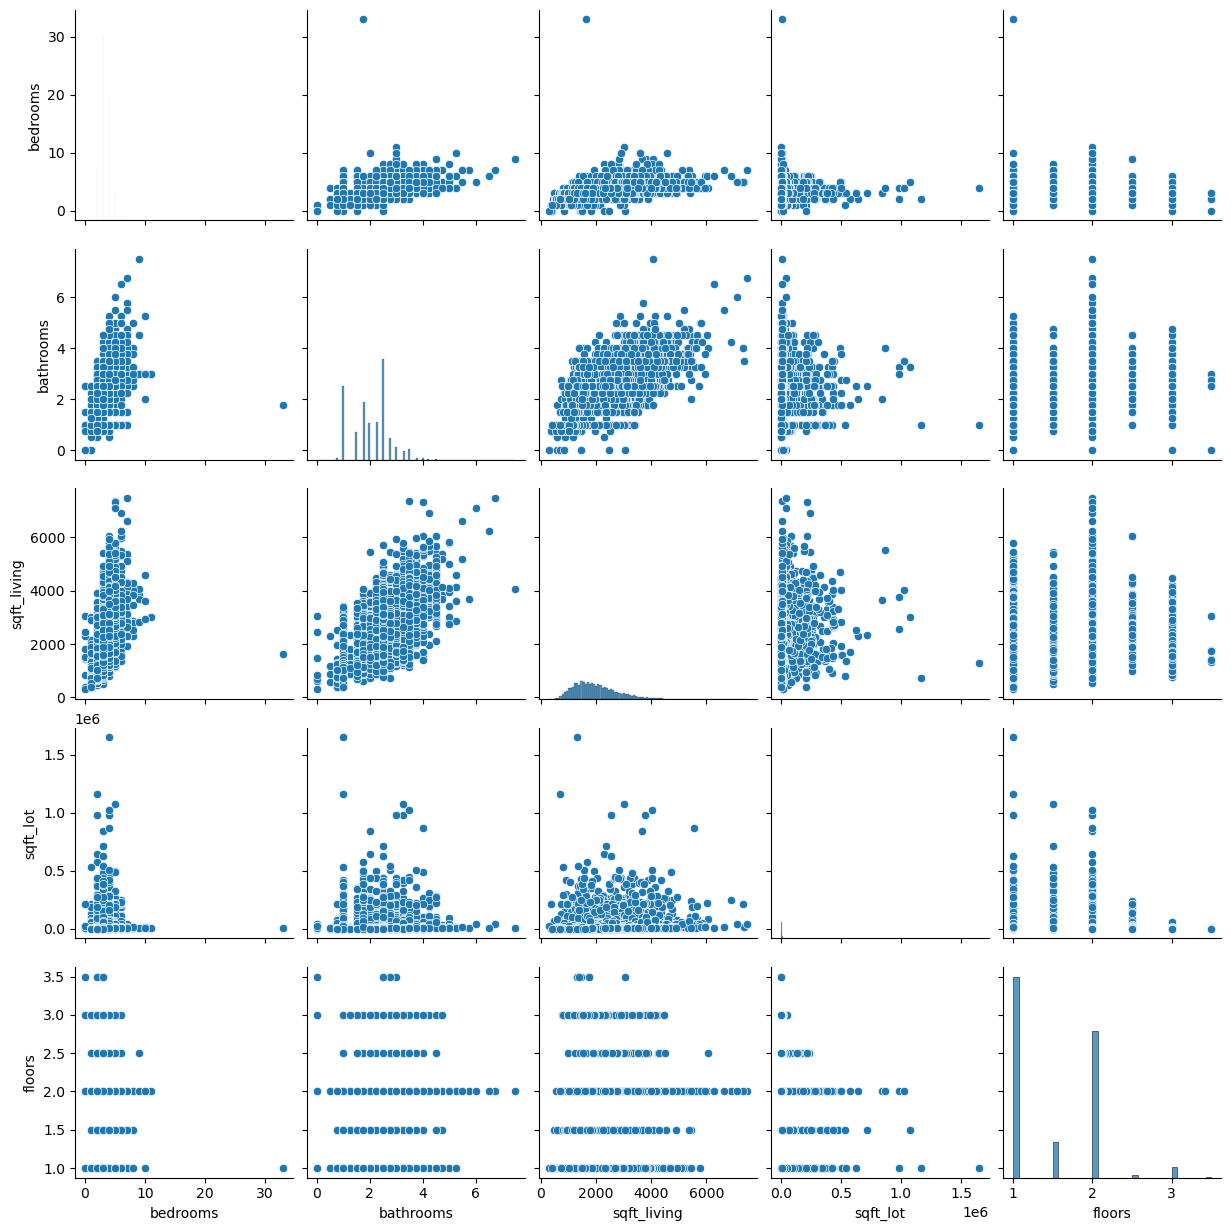

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['bedrooms','bathrooms','sqft_living' , 'sqft_lot', 'floors']

sns.pairplot(new_df[columns])
plt.show()

array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

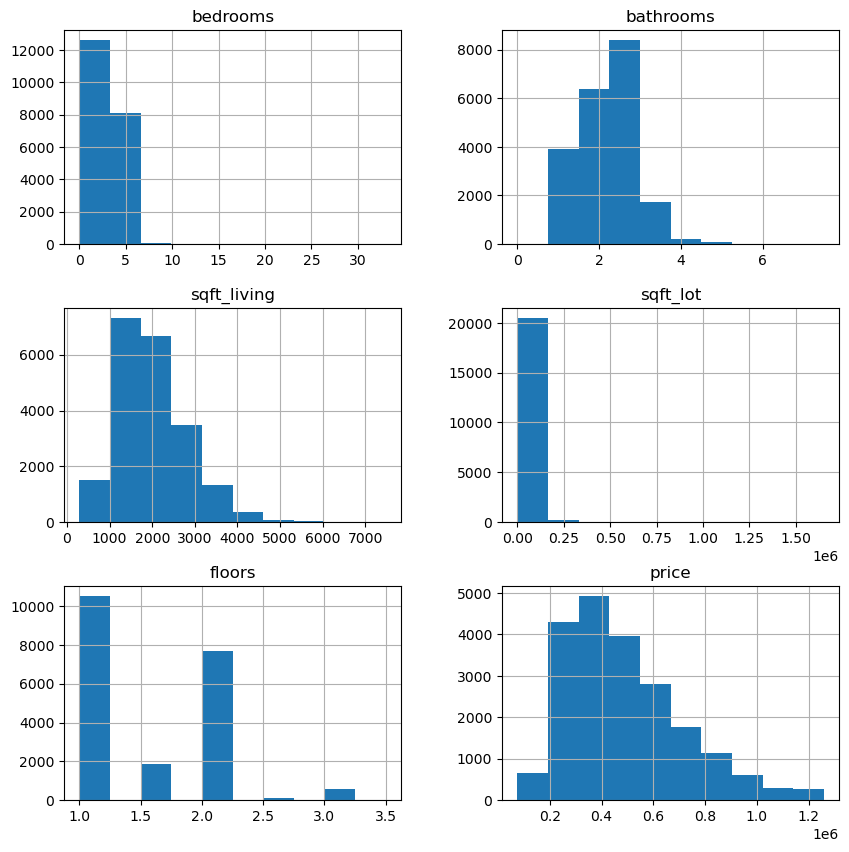

In [36]:
new_df.hist(figsize=(10,10))

### 💡2 Cycle
sqft_lot을 제거 하고 회귀 점수 추출

In [37]:
sqft_df = new_df.copy()

In [38]:
sqft_df = sqft_df.drop(labels=['sqft_lot'], axis=1)
sqft_df

,bedrooms,bathrooms,sqft_living,floors,price
0,3,1.00,1180,1.0,221900.0
1,3,2.25,2570,2.0,538000.0
2,2,1.00,770,1.0,180000.0
3,4,3.00,1960,1.0,604000.0
4,3,2.00,1680,1.0,510000.0
...,...,...,...,...,...
20737,3,2.50,1530,3.0,360000.0
20738,4,2.50,2310,2.0,400000.0
20739,2,0.75,1020,2.0,402101.0
20740,3,2.50,1600,2.0,400000.0


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = sqft_df.iloc[:,:-1], sqft_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [40]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [41]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 27916541382.2993, RMSE: 167082.4389, MSLE: 0.1236, RMSLE: 0.3515, R2: 0.4380


In [42]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [43]:
sqft_df

,bedrooms,bathrooms,sqft_living,floors,price
0,3,1.00,1180,1.0,221900.0
1,3,2.25,2570,2.0,538000.0
2,2,1.00,770,1.0,180000.0
3,4,3.00,1960,1.0,604000.0
4,3,2.00,1680,1.0,510000.0
...,...,...,...,...,...
20737,3,2.50,1530,3.0,360000.0
20738,4,2.50,2310,2.0,400000.0
20739,2,0.75,1020,2.0,402101.0
20740,3,2.50,1600,2.0,400000.0


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

features, targets = sqft_df.iloc[:,:-1], sqft_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.7, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=100)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 48022464443.4962, RMSE: 219140.2848, MSLE: 0.1993, RMSLE: 0.4465, R2: 0.0281
RandomForestRegressor
MSE: 34111794557.2064, RMSE: 184693.7859, MSLE: 0.1469, RMSLE: 0.3832, R2: 0.3097
GradientBoostingRegressor
MSE: 27600501209.4542, RMSE: 166133.9857, MSLE: 0.1225, RMSLE: 0.3500, R2: 0.4414
XGBRegressor
MSE: 30564239851.3826, RMSE: 174826.3134, MSLE: 0.1308, RMSLE: 0.3617, R2: 0.3815
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 289
[LightGBM] [Info] Number of data points in the train set: 6221, number of used features: 4
[LightGBM] [Info] Start training from score 485597.265391
LGBMRegressor
MSE: 28209765620.1982, RMSE: 167957.6304, MSLE: 0.1235, RMSLE: 0.3515, R2: 0.4291


In [45]:
from statsmodels.api import OLS

features, targets = sqft_df.iloc[:, :-1], sqft_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.895
Model:                            OLS   Adj. R-squared (uncentered):              0.895
Method:                 Least Squares   F-statistic:                          4.414e+04
Date:                Wed, 01 May 2024   Prob (F-statistic):                        0.00
Time:                        14:05:55   Log-Likelihood:                     -2.7961e+05
No. Observations:               20738   AIC:                                  5.592e+05
Df Residuals:                   20734   BIC:                                  5.593e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [47]:
get_vif(features)

,vif_score,feature
0,13.913298,bedrooms
1,23.340775,bathrooms
2,17.561109,sqft_living
3,9.573931,floors


#### 💡 R2 스코어가 더 떨어졌으므로 sqft_lot를 살리고 다시 실행

### 💡 3 Cycle
- floor Feature 제거 후 다시 분석

In [48]:
floor_df = new_df.copy()

In [49]:
floor_df = floor_df.drop(labels=['floors'], axis=1)
floor_df

,bedrooms,bathrooms,sqft_living,sqft_lot,price
0,3,1.00,1180,5650,221900.0
1,3,2.25,2570,7242,538000.0
2,2,1.00,770,10000,180000.0
3,4,3.00,1960,5000,604000.0
4,3,2.00,1680,8080,510000.0
...,...,...,...,...,...
20737,3,2.50,1530,1131,360000.0
20738,4,2.50,2310,5813,400000.0
20739,2,0.75,1020,1350,402101.0
20740,3,2.50,1600,2388,400000.0


In [50]:
from statsmodels.api import OLS

features, targets = floor_df.iloc[:, :-1], floor_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                          4.279e+04
Date:                Wed, 01 May 2024   Prob (F-statistic):                        0.00
Time:                        14:05:55   Log-Likelihood:                     -2.7990e+05
No. Observations:               20738   AIC:                                  5.598e+05
Df Residuals:                   20734   BIC:                                  5.598e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [51]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = floor_df.iloc[:,:-1], floor_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [53]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 28209398864.9705, RMSE: 167956.5386, MSLE: 0.1258, RMSLE: 0.3547, R2: 0.4321


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

features, targets = floor_df.iloc[:,:-1], floor_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.7, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=100)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 52933203255.6633, RMSE: 230072.1697, MSLE: 0.2253, RMSLE: 0.4747, R2: -0.0712
RandomForestRegressor
MSE: 29462144127.8281, RMSE: 171645.4023, MSLE: 0.1259, RMSLE: 0.3549, R2: 0.4038
GradientBoostingRegressor
MSE: 26177794907.2524, RMSE: 161795.5343, MSLE: 0.1143, RMSLE: 0.3380, R2: 0.4702
XGBRegressor
MSE: 29574639578.5302, RMSE: 171972.7873, MSLE: 0.1249, RMSLE: 0.3534, R2: 0.4015
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 537
[LightGBM] [Info] Number of data points in the train set: 6221, number of used features: 4
[LightGBM] [Info] Start training from score 485597.265391
LGBMRegressor
MSE: 26676217937.0141, RMSE: 163328.5582, MSLE: 0.1147, RMSLE: 0.3386, R2: 0.4601


In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [56]:
get_vif(features)

,vif_score,feature
0,13.406270,bedrooms
1,18.006725,bathrooms
2,18.100515,sqft_living
3,1.172940,sqft_lot


In [57]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f},  R2: {:.4f}'\
          .format(MSE, RMSE, R2))

In [58]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

features, targets = floor_df.iloc[:,:-1], floor_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [59]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 27993305719.9101, RMSE: 167312.0011,  R2: 0.4365


#### ✏️ floor를 제거했더니, GBM 같은 경우 sqft_lot을 제거 했을 때보다 r2 스코어는 증가하였지만, 여전히 기존 데이터에 비해선 낮은 점수를 기록하였다.  

### 💡 4 Cycle
- bedrooms or bathrooms  Feature 제거 후 분석

In [60]:
b_df = new_df.copy()

In [61]:
b_df = b_df.drop(labels=['bedrooms'], axis=1)
b_df

,bathrooms,sqft_living,sqft_lot,floors,price
0,1.00,1180,5650,1.0,221900.0
1,2.25,2570,7242,2.0,538000.0
2,1.00,770,10000,1.0,180000.0
3,3.00,1960,5000,1.0,604000.0
4,2.00,1680,8080,1.0,510000.0
...,...,...,...,...,...
20737,2.50,1530,1131,3.0,360000.0
20738,2.50,2310,5813,2.0,400000.0
20739,0.75,1020,1350,2.0,402101.0
20740,2.50,1600,2388,2.0,400000.0


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = b_df.iloc[:,:-1], b_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [63]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [64]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 28301265974.2184, RMSE: 168229.8011, MSLE: 0.1258, RMSLE: 0.3547, R2: 0.4303


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

features, targets = b_df.iloc[:,:-1], b_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.7, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=100)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 52775089712.6411, RMSE: 229728.2954, MSLE: 0.2230, RMSLE: 0.4722, R2: -0.0680
RandomForestRegressor
MSE: 29287611068.7134, RMSE: 171136.2354, MSLE: 0.1255, RMSLE: 0.3543, R2: 0.4073
GradientBoostingRegressor
MSE: 26152713311.7035, RMSE: 161718.0055, MSLE: 0.1140, RMSLE: 0.3376, R2: 0.4707
XGBRegressor
MSE: 29210001633.7973, RMSE: 170909.3375, MSLE: 0.1233, RMSLE: 0.3511, R2: 0.4089
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 534
[LightGBM] [Info] Number of data points in the train set: 6221, number of used features: 4
[LightGBM] [Info] Start training from score 485597.265391
LGBMRegressor
MSE: 26570835255.3519, RMSE: 163005.6295, MSLE: 0.1142, RMSLE: 0.3379, R2: 0.4623


In [66]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

features, targets = b_df.iloc[:,:-1], b_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [67]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f},  R2: {:.4f}'\
          .format(MSE, RMSE, R2))

In [68]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 28053707475.1263, RMSE: 167492.4102,  R2: 0.4352


In [69]:
from statsmodels.api import OLS

features, targets = b_df.iloc[:, :-1], b_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.895
Model:                            OLS   Adj. R-squared (uncentered):              0.895
Method:                 Least Squares   F-statistic:                          4.411e+04
Date:                Wed, 01 May 2024   Prob (F-statistic):                        0.00
Time:                        14:06:04   Log-Likelihood:                     -2.7962e+05
No. Observations:               20738   AIC:                                  5.592e+05
Df Residuals:                   20734   BIC:                                  5.593e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

### ✨ 우선 Feature 제거 없이 기존 범주형은 인코딩 작업, 각 Feature 분포 업데이트 후 결과 확인 

In [70]:
h_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,3,8,1530,0,2009,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,3,8,2310,0,2014,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,3,7,1020,0,2009,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,3,8,1600,0,2004,1410,1287


In [71]:
h_df.corr()['price'].sort_values(ascending=False)[1:]

sqft_living      0.702041
grade            0.667553
sqft_above       0.605576
sqft_living15    0.585376
bathrooms        0.525163
sqft_basement    0.323829
bedrooms         0.308389
floors           0.256921
sqft_lot         0.089646
sqft_lot15       0.082427
yr_built         0.054098
condition        0.036331
Name: price, dtype: float64

In [72]:
h_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [73]:
sqft_df = sqft_df.drop_duplicates()
sqft_df.duplicated().sum()

0

In [74]:
floor_df = floor_df.drop_duplicates()
floor_df.duplicated().sum()

0

In [75]:
b_df = b_df.drop_duplicates()
b_df.duplicated().sum()

0

In [76]:
b_df

,bathrooms,sqft_living,sqft_lot,floors,price
0,1.00,1180,5650,1.0,221900.0
1,2.25,2570,7242,2.0,538000.0
2,1.00,770,10000,1.0,180000.0
3,3.00,1960,5000,1.0,604000.0
4,2.00,1680,8080,1.0,510000.0
...,...,...,...,...,...
20737,2.50,1530,1131,3.0,360000.0
20738,2.50,2310,5813,2.0,400000.0
20739,0.75,1020,1350,2.0,402101.0
20740,2.50,1600,2388,2.0,400000.0


array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

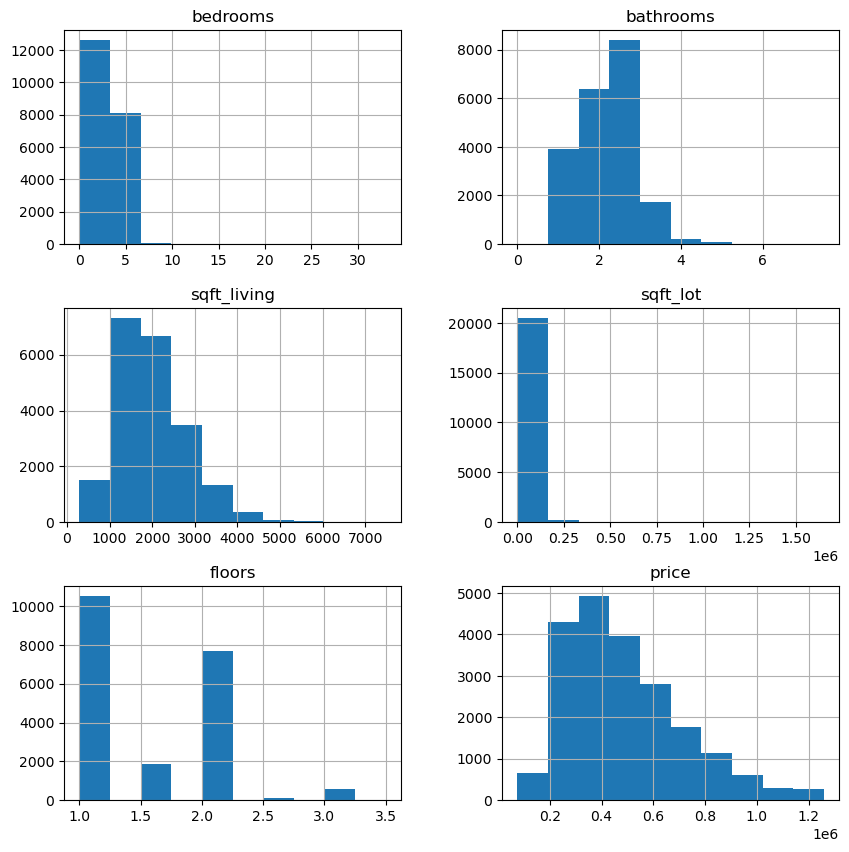

In [77]:
new_df.hist(figsize=(10,10))

In [78]:
log_df = new_df.copy()

In [79]:
log_df.bathrooms = np.log1p(new_df['bathrooms'])
log_df.bedrooms = np.log1p(new_df['bedrooms'])

array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

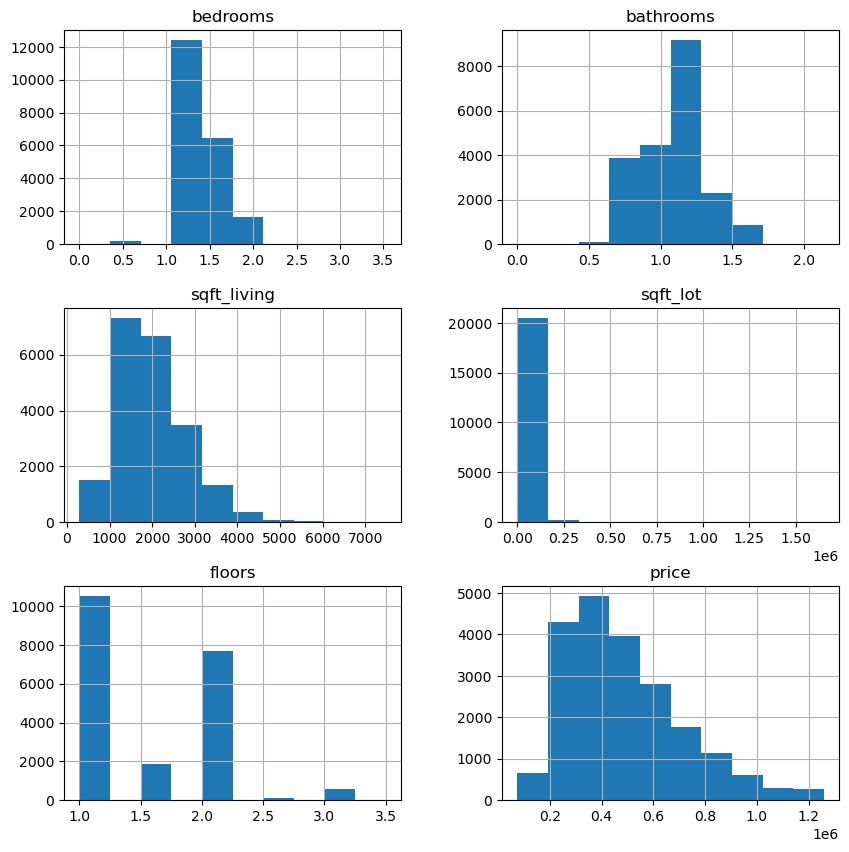

In [80]:
log_df.reset_index(drop=True)
log_df.hist(figsize=(10,10))

In [81]:
log_df.floors.value_counts()

floors
1.0    10504
2.0     7676
1.5     1856
3.0      578
2.5      117
3.5        7
Name: count, dtype: int64

In [83]:
log_df.reset_index(drop=True)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,1.386294,0.693147,1180,5650,1.0,221900.0
1,1.386294,1.178655,2570,7242,2.0,538000.0
2,1.098612,0.693147,770,10000,1.0,180000.0
3,1.609438,1.386294,1960,5000,1.0,604000.0
4,1.386294,1.098612,1680,8080,1.0,510000.0
...,...,...,...,...,...,...
20733,1.386294,1.252763,1530,1131,3.0,360000.0
20734,1.609438,1.252763,2310,5813,2.0,400000.0
20735,1.098612,0.559616,1020,1350,2.0,402101.0
20736,1.386294,1.252763,1600,2388,2.0,400000.0


In [84]:
log_df = log_df[log_df['floors'] < 2.5]

array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

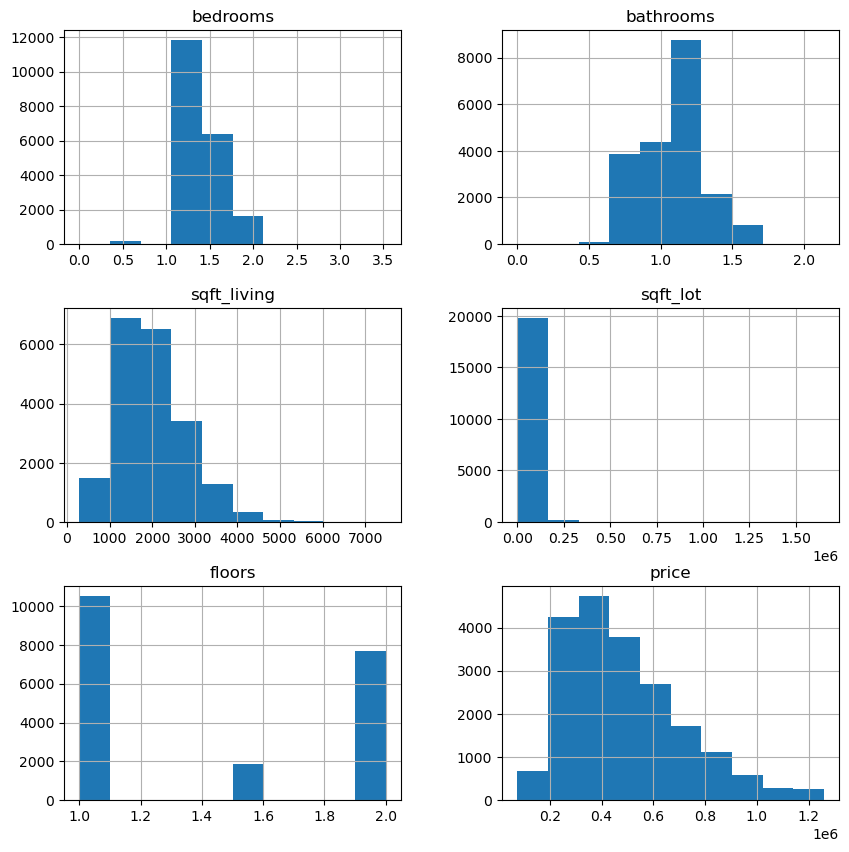

In [85]:
log_df.hist(figsize=(10,10))

In [86]:
log_df.floors.value_counts()

floors
1.0    10504
2.0     7676
1.5     1856
Name: count, dtype: int64

In [87]:
log_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,1.386294,0.693147,1180,5650,1.0,221900.0
1,1.386294,1.178655,2570,7242,2.0,538000.0
2,1.098612,0.693147,770,10000,1.0,180000.0
3,1.609438,1.386294,1960,5000,1.0,604000.0
4,1.386294,1.098612,1680,8080,1.0,510000.0
...,...,...,...,...,...,...
20736,1.386294,1.252763,1310,1294,2.0,475000.0
20738,1.609438,1.252763,2310,5813,2.0,400000.0
20739,1.098612,0.559616,1020,1350,2.0,402101.0
20740,1.386294,1.252763,1600,2388,2.0,400000.0


In [88]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

features, targets = log_df.iloc[:,:-1], log_df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, random_state=124, test_size=0.2)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [89]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f},  R2: {:.4f}'\
          .format(MSE, RMSE, R2))

In [90]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 29032999063.5817, RMSE: 170390.7247,  R2: 0.4152


#### ✨ 로그치환 및 일반화 작업 뒤 선형 회귀 결과 
- R2 값이 0.4152로 기존 모델보다 더 성능이 떨어진 것을 알 수 있다.

In [91]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features , targets = log_df.iloc[:,:-1], log_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dtc_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=100)
lgb_r = LGBMRegressor(n_estimators=100)
xgb_r = XGBRegressor()

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 51526218163.9843, RMSE: 226993.8725,  R2: -0.0378
RandomForestRegressor
MSE: 27943364850.7554, RMSE: 167162.6898,  R2: 0.4372
GradientBoostingRegressor
MSE: 25727738026.0479, RMSE: 160398.6846,  R2: 0.4818
XGBRegressor
MSE: 26610155894.7011, RMSE: 163126.1962,  R2: 0.4640
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 549
[LightGBM] [Info] Number of data points in the train set: 16028, number of used features: 5
[LightGBM] [Info] Start training from score 484477.890567
LGBMRegressor
MSE: 25230500032.8269, RMSE: 158841.1157,  R2: 0.4918


In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

rf_r = RandomForestRegressor(random_state=124)

parameters = {'max_depth': [1,2,3], 'min_samples_split': [5,6,7], 'n_estimators': [10, 50, 100]}
kfold = KFold(n_splits=10, random_state=124, shuffle=True)

# grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='neg_mean_squared_error', cv=kfold)
grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='r2', cv=kfold)
grid_rf_r.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=124, shuffle=True),
             estimator=RandomForestRegressor(random_state=124),
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [5, 6, 7],
                         'n_estimators': [10, 50, 100]},
             scoring='r2')

In [94]:
prediction = grid_rf_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 28384487648.1730, RMSE: 168476.9647,  R2: 0.4283


In [97]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=4).fit_transform(features)

features, targets = log_df.iloc[:,:-1], log_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

p_r = LinearRegression()
p_r.fit(X_train, y_train)

LinearRegression()

In [98]:
prediction = p_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 29999931174.7834, RMSE: 173204.8821,  R2: 0.3958


In [100]:
from statsmodels.api import OLS

features, targets = log_df.iloc[:, :-1], log_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.895
Model:                            OLS   Adj. R-squared (uncentered):              0.895
Method:                 Least Squares   F-statistic:                          3.412e+04
Date:                Wed, 01 May 2024   Prob (F-statistic):                        0.00
Time:                        14:10:53   Log-Likelihood:                     -2.7008e+05
No. Observations:               20036   AIC:                                  5.402e+05
Df Residuals:                   20031   BIC:                                  5.402e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [102]:
get_vif(features)

,vif_score,feature
0,28.939210,bedrooms
1,48.502536,bathrooms
2,15.008818,sqft_living
3,1.170980,sqft_lot
4,13.912271,floors


### ✨ 일반화 작업 후 회귀 결과에서 LightGBM 회귀 모델에서 R2 값이 0.4918로 가장 높아졌다.
### ✏️ 결론 : 각 독립변수들의 분포를 맞춘 뒤 작업을 하면 효과적이다.